# Data processing with pandas, lesson 7: use case ecommerce

We are going to attack today a realistic practical case. Although this is e-commerce, the same logic, form and analysis applies to commercial and marketing issues in other fields, notably banking/insurance and telecoms.

Form of the data: In practice, with current information systems, the data is stored in different tables and linked together with keys (Merise in BDD). It is first necessary to consolidate them

# Download data

Download all the files https://www.kaggle.com/olistbr/brazilian-ecommerce

# Consolidate data by orders

Orders is the table that contains the most links with other tables

Merge the orders table with payments. With which key are you going to merge? What will be the value of the how parameter?

Merge the previous table with payments. With which key are you going to merge? What will be the value of the how parameter?

Analyze data by order. For example :
- How many orders per month?
- How many figures per month?
- % of orders per hour and per day? (entry 29 https://www.kaggle.com/goldendime/data-cleaning-viz-and-stat-analysis-on-e-com)
- % of CA per hour and per day?
- Distribution of states by orders
- Distribution of states by CA
- % of orders by means of payment by state
- % of CA by means of payment by state
- % of orders by means of payment per month
- % of turnover per means of payment per month
- ... (inspire yourself from the contributions in notebook of the kaggle dataset)

Represent these analyzes visually with https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

# Consolidate data by customer

Customer table with number of orders, sum of payments, date of the first order (transform the date with pd.to_datetime()), date of the last order, the state

Analyze data by customer.

# Issue: Retention

Barely 3% of customers make more than one purchase.

Perform additional analyzes to provide actionable recommendations to improve this retention rate.

Advice :
- I insist on the actionable side of the recommendation, I don't just want a graph or a table;
- Feel free to make assumptions or a framework (ex: I assume the CAC is X euros as it is the standard in the industry given this source, I assume that setting up this solution costs Y given this source, etc);
- Take inspiration from the marketing literature (retention, life time value, customer acquisition cost, chunrn rate, etc.) to help you read the results and draw your conclusions;
- Do not get lost in machine learning or econometric and statistical modeling, simple graphs and tables to support your remarks will be enough (if you make models or machine learning, that's in addition).

# Merge

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
category_name_translation = pd.read_csv("product_category_name_translation.csv")

In [2]:
orders_data1= pd.merge(orders, order_payments,on='order_id')

In [3]:
base_data = pd.merge(orders_data1 ,order_reviews,on='order_id')
base_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [4]:
base_df = pd.merge(base_data, order_payments, on='order_id')
base_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_x,payment_type_x,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122938,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,...,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08,1,credit_card,3,85.08
122939,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,...,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1,credit_card,3,195.00
122940,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,...,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,credit_card,5,271.01
122941,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,...,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,credit_card,4,441.16


In [5]:
# How many orders per month?
import pandas as pd
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'])
#create column for month
base_df['order_month'] = base_df['order_purchase_timestamp'].dt.to_period('M')
#group orders by month and count the number
orders_per_month = base_df.groupby('order_month').size()
#display
print(orders_per_month)

order_month
2016-09       3
2016-10     409
2016-12       1
2017-01    1193
2017-02    2264
2017-03    3630
2017-04    3907
2017-05    5387
2017-06    4664
2017-07    5844
2017-08    5672
2017-09    5632
2017-10    5513
2017-11    9199
2017-12    6933
2018-01    8377
2018-02    7739
2018-03    8578
2018-04    8237
2018-05    8171
2018-06    7256
2018-07    7103
2018-08    7212
2018-09      15
2018-10       4
Freq: M, dtype: int64


In [6]:
import pandas as pd

# convert 'order_purchase_timestamp' column to datetime type
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'])

# create 'order_month' column with the month of the order
base_df['order_month'] = base_df['order_purchase_timestamp'].dt.month

# create an empty dictionary to store the results
orders_per_month = {}

# loop through each month from January to December
for month in range(1, 13):
    
    # get the total number of orders for the current month
    orders = base_df.loc[base_df['order_month'] == month, 'order_month'].count()
    
    # add the month and the total number of orders to the dictionary
    orders_per_month[month] = orders
    
# display the dictionary
print(orders_per_month)

{1: 9570, 2: 10003, 3: 12208, 4: 12144, 5: 13558, 6: 11920, 7: 12947, 8: 12884, 9: 5650, 10: 5926, 11: 9199, 12: 6934}


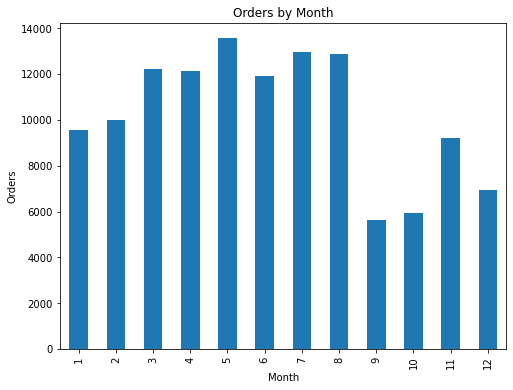

In [7]:
import matplotlib.pyplot as plt

# Copy the dictionary with orders per month to a Pandas DataFrame
df = pd.DataFrame.from_dict(orders_per_month, orient='index', columns=['orders'])

# Create a bar chart
ax = df.plot(kind='bar', legend=None, figsize=(8,6))

# Set the axis labels and chart title
ax.set_xlabel("Month")
ax.set_ylabel("Orders")
ax.set_title("Orders by Month")

# Show the chart
plt.show()

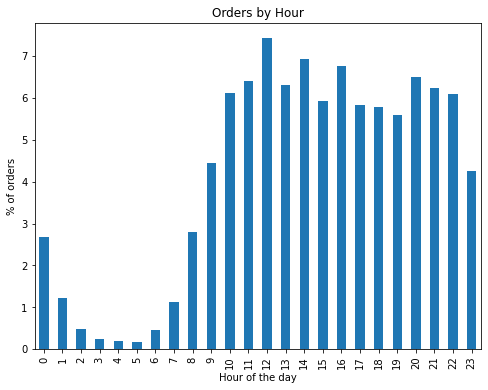

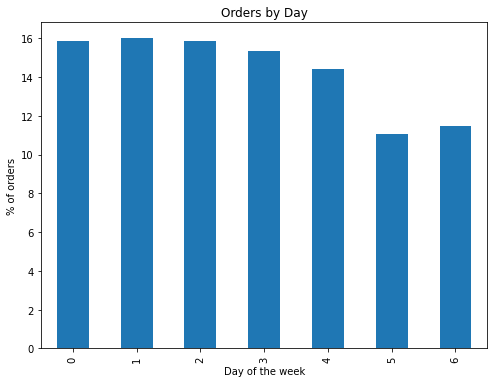

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'order_purchase_timestamp' column to datetime type
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'])

# create 'order_hour' column with the hour of the order
base_df['order_hour'] = base_df['order_purchase_timestamp'].dt.hour

# create 'order_day' column with the day of the week of the order (0=Monday, 6=Sunday)
base_df['order_day'] = base_df['order_purchase_timestamp'].dt.dayofweek

# create an empty dictionary to store the results
orders_per_hour = {}
orders_per_day = {}

# get the total number of orders for the entire dataset
total_orders = base_df.shape[0]

# loop through each hour of the day (0-23)
for hour in range(0, 24):
    
    # get the total number of orders for the current hour
    orders = base_df.loc[base_df['order_hour'] == hour, 'order_hour'].count()
    
    # calculate the percentage of orders for the current hour
    percent_orders = orders / total_orders * 100
    
    # add the hour and the percentage of orders to the dictionary
    orders_per_hour[hour] = percent_orders
    
# loop through each day of the week (0=Monday, 6=Sunday)
for day in range(0, 7):
    
    # get the total number of orders for the current day
    orders = base_df.loc[base_df['order_day'] == day, 'order_day'].count()
    
    # calculate the percentage of orders for the current day
    percent_orders = orders / total_orders * 100
    
    # add the day and the percentage of orders to the dictionary
    orders_per_day[day] = percent_orders

# create a bar chart for orders per hour
df_hour = pd.DataFrame.from_dict(orders_per_hour, orient='index', columns=['percent_orders'])
ax_hour = df_hour.plot(kind='bar', legend=None, figsize=(8,6))
ax_hour.set_xlabel("Hour of the day")
ax_hour.set_ylabel("% of orders")
ax_hour.set_title("Orders by Hour")
plt.show()

# create a bar chart for orders per day
df_day = pd.DataFrame.from_dict(orders_per_day, orient='index', columns=['percent_orders'])
ax_day = df_day.plot(kind='bar', legend=None, figsize=(8,6))
ax_day.set_xlabel("Day of the week")
ax_day.set_ylabel("% of orders")
ax_day.set_title("Orders by Day")
plt.show()


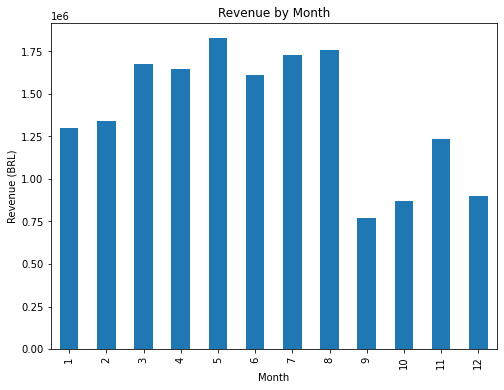

In [9]:
# Revenues per month?
import pandas as pd
import matplotlib.pyplot as plt

# convert 'order_purchase_timestamp' column to datetime type
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'])

# create 'order_month' column with the month of the order
base_df['order_month'] = base_df['order_purchase_timestamp'].dt.month

# create an empty dictionary to store the results
revenue_per_month = {}

# loop through each month from January to December
for month in range(1, 13):
    
    # get the total revenue for the current month
    revenue = base_df.loc[base_df['order_month'] == month, 'payment_value_y'].sum()
    
    # add the month and the total revenue to the dictionary
    revenue_per_month[month] = revenue
    
# convert the dictionary to a Pandas DataFrame and sort by month
df = pd.DataFrame.from_dict(revenue_per_month, orient='index', columns=['revenue'])
df.sort_index(inplace=True)

# create a bar chart
ax = df.plot(kind='bar', legend=None, figsize=(8,6))

# set the axis labels and chart title
ax.set_xlabel("Month")
ax.set_ylabel("Revenue (BRL)")
ax.set_title("Revenue by Month")

# show the chart
plt.show()

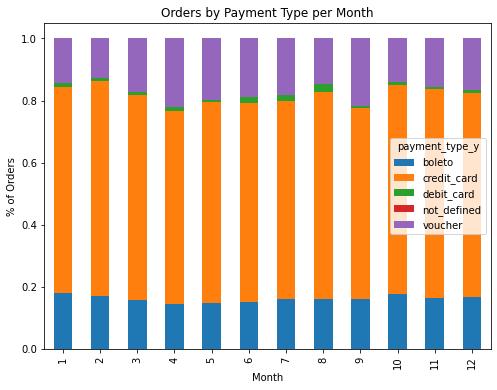

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'order_purchase_timestamp' column to datetime type
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'])

# create 'order_month' column with the month of the order
base_df['order_month'] = base_df['order_purchase_timestamp'].dt.month

# group orders by month and payment type, and count the number of orders in each group
order_counts = base_df.groupby(['order_month', 'payment_type_y'])['order_id'].count().reset_index()

# create a pivot table to calculate the percentage of orders by payment type for each month
order_pivot = pd.pivot_table(order_counts, values='order_id', index='order_month', columns='payment_type_y', aggfunc=sum, fill_value=0)
order_pivot['total_orders'] = order_pivot.sum(axis=1)
order_pivot = order_pivot.div(order_pivot.total_orders, axis=0).drop(columns='total_orders')

# create a stacked bar chart
ax = order_pivot.plot(kind='bar', stacked=True, legend=True, figsize=(8,6))

# set the axis labels and chart title
ax.set_xlabel("Month")
ax.set_ylabel("% of Orders")
ax.set_title("Orders by Payment Type per Month")

# show the chart
plt.show()


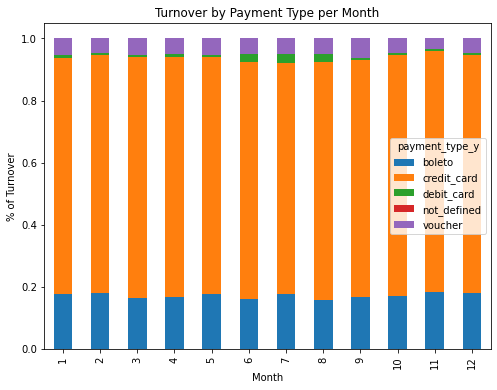

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'order_purchase_timestamp' column to datetime type
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'])

# create 'order_month' column with the month of the order
base_df['order_month'] = base_df['order_purchase_timestamp'].dt.month

# group orders by month, payment type and calculate the total payment value for each group
order_payments = base_df.groupby(['order_month', 'payment_type_y'])['payment_value_y'].sum().reset_index()

# create a pivot table to calculate the percentage of payment value by payment type for each month
payment_pivot = pd.pivot_table(order_payments, values='payment_value_y', index='order_month', columns='payment_type_y', aggfunc=sum, fill_value=0)
payment_pivot['total_payments'] = payment_pivot.sum(axis=1)
payment_pivot = payment_pivot.div(payment_pivot.total_payments, axis=0).drop(columns='total_payments')

# create a stacked bar chart
ax = payment_pivot.plot(kind='bar', stacked=True, legend=True, figsize=(8,6))

# set the axis labels and chart title
ax.set_xlabel("Month")
ax.set_ylabel("% of Turnover")
ax.set_title("Turnover by Payment Type per Month")

# show the chart
plt.show()

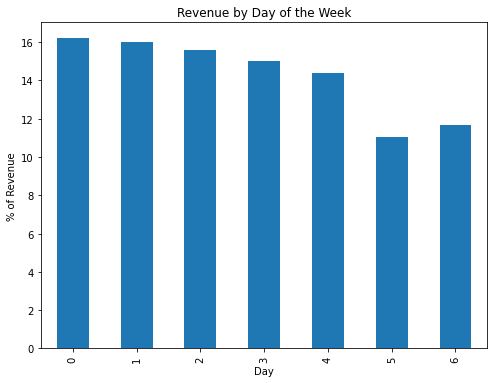

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'order_purchase_timestamp' column to datetime type
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'])

# create 'order_hour' column with the hour of the order
base_df['order_hour'] = base_df['order_purchase_timestamp'].dt.hour

# create 'order_day' column with the day of the week of the order
base_df['order_day'] = base_df['order_purchase_timestamp'].dt.dayofweek

# calculate the total payment value for each hour and day of the week
hourly_revenue = base_df.groupby(['order_hour'])['payment_value_y'].sum()
daily_revenue = base_df.groupby(['order_day'])['payment_value_y'].sum()

# calculate the total revenue
total_revenue = base_df['payment_value_y'].sum()

# calculate the percentage of revenue for each hour and day of the week
hourly_revenue_percent = hourly_revenue / total_revenue * 100
daily_revenue_percent = daily_revenue / total_revenue * 100

# create a bar chart for hourly revenue
ax1 = hourly_revenue_percent.plot(kind='bar', legend=None, figsize=(8,6))

# set the axis labels and chart title
ax1.set_xlabel("Hour")
ax1.set_ylabel("% of Revenue")
ax1.set_title("Revenue by Hour")

# create a bar chart for daily revenue
ax2 = daily_revenue_percent.plot(kind='bar', legend=None, figsize=(8,6))

# set the axis labels and chart title
ax2.set_xlabel("Day")
ax2.set_ylabel("% of Revenue")
ax2.set_title("Revenue by Day of the Week")

# show the charts
plt.show()


In [13]:
print(order_payments.columns)
print(customers.columns)
print(customers)

Index(['order_month', 'payment_type_y', 'payment_value_y'], dtype='object')
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166